In [1]:
from scipy import stats
import numpy as np
# Perform Kolmogorov-Smirnov test
data = np.load('dataset-one.npy')
stat, p_value = stats.kstest(data, 'norm')

print(f"KS Test: Statistic = {stat}, p-value = {p_value}")
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")

KS Test: Statistic = 0.5029892261999548, p-value = 0.0
The data is not normally distributed.


Since the dataset-one is a large dataset, even small deviations from normality can lead to the rejection of null hypothesis. 

             0
0  -199.230518
1  -199.774863
2  -542.664253
3  -572.643798
4  1441.809790
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None
Computed Bias: -0.017535845623187066


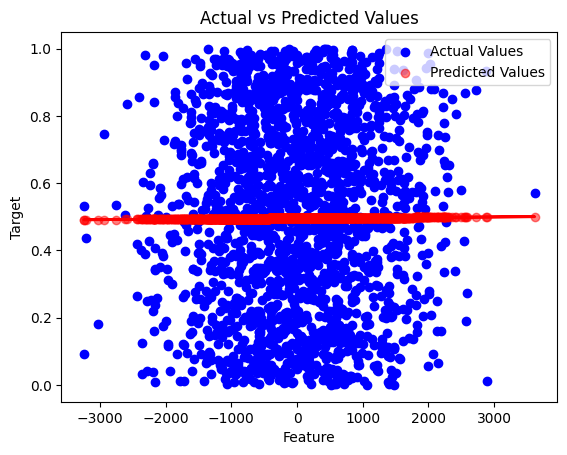

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# data = np.load('dataset-one.npy')
data = np.load('dataset-one.npy', allow_pickle=True)

df = pd.DataFrame(data)

print(df.head())  # Display the first few rows
print(df.info())  # Get information about the dataset

# Step 4: Define Features and Target
# Replace 0 and 1 with the actual indices of your feature and target columns
X = df.iloc[:, [0]]  # First column as features
y = np.random.rand(len(X))  # Create a random target variable for example
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Compute Bias
bias = np.mean(y_pred - y_test)  # Average of predicted - actual values

# Step 9: Print the Bias
print(f"Computed Bias: {bias}")

# Optional: Plot the Results
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

Model Bias: Bias refers to the error caused by assumptions made by the model to simplify the learning process. It is the difference between the expected prediction of the model and the actual value of the target variable. 
- Positive Bias: The model tend to overpredict
- Negative Bias: The model tend to underpredict.

Our dataset-one has negative bais in LinearRegression. This means, the model underpredicts. Although, the magnitude of the bias ~0.017, is quite small, we can not discard this observation, as 
- A model can have a small bias but still exhibit a significant difference in distribution, which the KS test would reveal.
- Even if the bias is small, if the KS test returns a significant result (low p-value), which it does (0.0), it indicates that the predicted and actual distributions differ significantly.

Now, to see if the model need improvement, we will analyze residuals.

In [9]:
import numpy as np

residuals = y_test - y_pred

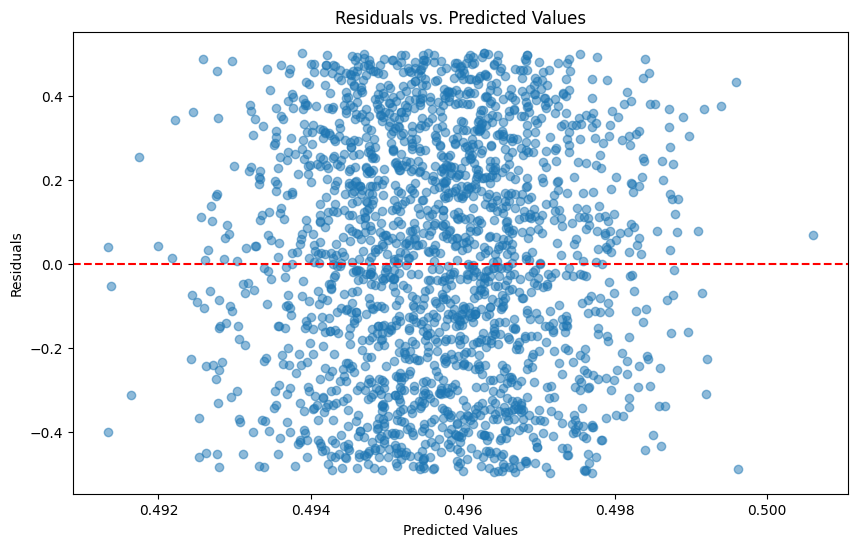

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at zero
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


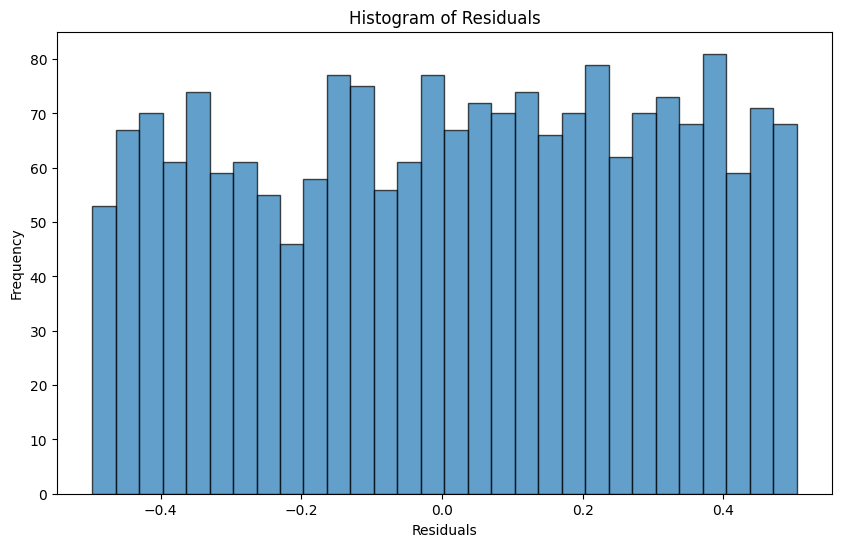

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


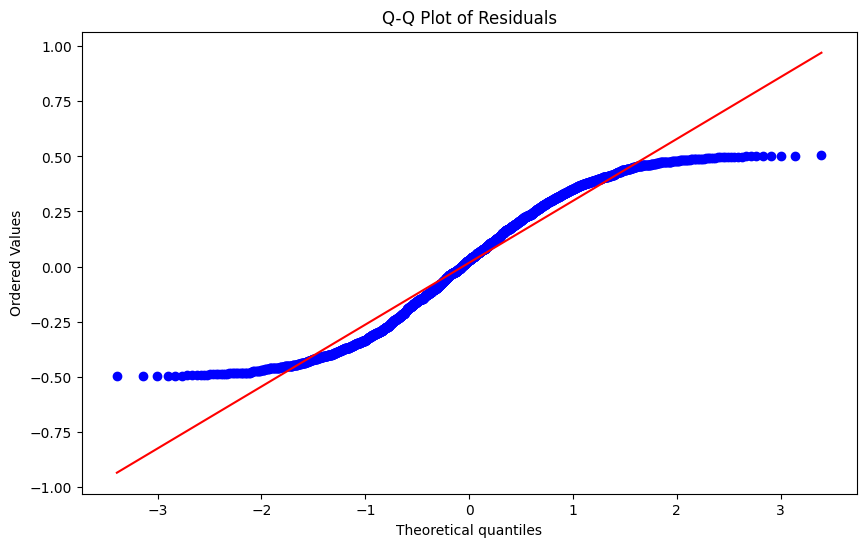

In [12]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [13]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f'Statistic: {stat}, P-value: {p_value}')
if p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")


Statistic: 0.9553763441848995, P-value: 2.882434498748115e-24
Residuals are not normally distributed.


Overvations made from the above test done:
- Since the residuals are not normally distributed, it indicates that the linear regression model's assumptions are violated. Ideally, residuals should be normally distributed around zero for valid statistical inference.
- Moreover, the residuals align in a straight line while the data points are scattered, it may suggest that there are systematic errors in our model. This pattern could indicate issues like:
  - Model Misspecification: The linear model may not be the best fit for our data (e.g., non-linear relationships).
  - Omitted Variable Bias: Important predictor variables might be missing from the model.
  - Presence of Outliers: Outliers can significantly affect the model’s performance and lead to biased predictions.

Conclusion: The model 'LinearRegression' is not fit for out data and hence needs improvement.

Things to do now: 
- Examine the dataset for additional features that may improve the model. This can be done by creating interaction terms or by transforming existing features (e.g. logarithmic, square root)
- Check for outliers
   - What are outliers?
      - Outliers are datapoints in the datset that differs from the rest of the data and can cause/distort analysis of statisticial models.
- Use different models, may be one of the following:
   - Ridge regression
   - Lasso regression
   - Decision trees or random forests

We now check for outliers using:
- Boxplot method to visualize the presence of outliers
- Z-Score method, which is effective for normal distribution.

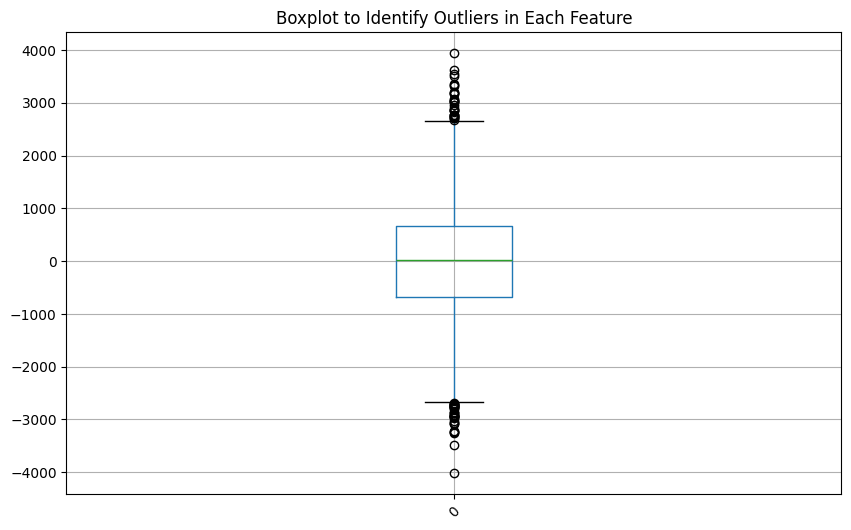

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.load('dataset-one.npy')
df = pd.DataFrame(data)

# Plot boxplots for each feature (column) in the dataset
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot to Identify Outliers in Each Feature")
plt.xticks(rotation=45)
plt.show()

Observations:
- Since the median is in the centre, the data is symmetric and there is absense of skewness (+ve or -ve) also confirmed by the skewness-kurtosis test.
- $Q1$ and $Q3$ are approximately $-700$ and $700$, respectively. Therefore, Interquartile Range i.e., $IQR$ is approx. $1400$.
- It is evident from the plot that there are presence of datas outside whiskers range which is $(-(Q1 + 1.5 \times IQR), (Q1 + 1.5 \times IQR)) \sim (-2800, 2800)$.
- This confirms the presense of outliers, which may have caused the KS-test to reject null hypothesis.

In [3]:
from scipy.stats import zscore

data = np.load('dataset-one.npy')
df = pd.DataFrame(data)

# Calculate Z-scores for each column and filter out points with Z-score > 3 or < -3
z_scores = np.abs(zscore(df))
outliers_z = np.where(z_scores > 3)
outliers_z = list(zip(outliers_z[0], outliers_z[1]))  # List of (row, column) indices of outliers

print("Outliers based on Z-score method (rows and columns):", outliers_z)

Outliers based on Z-score method (rows and columns): [(np.int64(151), np.int64(0)), (np.int64(388), np.int64(0)), (np.int64(505), np.int64(0)), (np.int64(1854), np.int64(0)), (np.int64(2257), np.int64(0)), (np.int64(2555), np.int64(0)), (np.int64(2621), np.int64(0)), (np.int64(3198), np.int64(0)), (np.int64(3292), np.int64(0)), (np.int64(3300), np.int64(0)), (np.int64(3687), np.int64(0)), (np.int64(3775), np.int64(0)), (np.int64(3813), np.int64(0)), (np.int64(4415), np.int64(0)), (np.int64(5225), np.int64(0)), (np.int64(5385), np.int64(0)), (np.int64(6255), np.int64(0)), (np.int64(6672), np.int64(0)), (np.int64(6793), np.int64(0)), (np.int64(7292), np.int64(0)), (np.int64(7550), np.int64(0)), (np.int64(7986), np.int64(0)), (np.int64(8272), np.int64(0)), (np.int64(8773), np.int64(0)), (np.int64(8979), np.int64(0)), (np.int64(9488), np.int64(0)), (np.int64(9610), np.int64(0)), (np.int64(9980), np.int64(0))]


Observation:
- Z-Score test reaffirms the presence of outliers.

Conclusion: 
- We can disregard the KS-test and can safely assume that the dataset-one is normally distributed. 